# Mineração em Grafos

Luana Lima Freitas - T

## Video do trabalho
 [Clique aqui para assistir](https://)

In [15]:
import numpy as np
import pandas as pd
import networkx as nx
import gdown
import re
import sys
import glob
import difflib
import matplotlib.pyplot as plt

## Importando os dados

In [2]:
# Baixando o arquivo
!gdown 1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q

Downloading...
From: https://drive.google.com/uc?id=1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q
To: /content/genius.zip
100% 1.11M/1.11M [00:00<00:00, 95.9MB/s]


In [3]:
# Extraindo o arquivo
!unzip genius.zip

Archive:  genius.zip
   creating: genius/
  inflating: __MACOSX/._genius       
   creating: genius/s05/
  inflating: __MACOSX/genius/._s05   
   creating: genius/s02/
  inflating: __MACOSX/genius/._s02   
   creating: genius/s03/
  inflating: __MACOSX/genius/._s03   
   creating: genius/s04/
  inflating: __MACOSX/genius/._s04   
   creating: genius/s01/
  inflating: __MACOSX/genius/._s01   
   creating: genius/s06/
  inflating: __MACOSX/genius/._s06   
   creating: genius/s08/
  inflating: __MACOSX/genius/._s08   
   creating: genius/s07/
  inflating: __MACOSX/genius/._s07   
  inflating: genius/ref.txt          
  inflating: __MACOSX/genius/._ref.txt  
  inflating: genius/s05/got_s05e09.txt  
  inflating: __MACOSX/genius/s05/._got_s05e09.txt  
  inflating: genius/s05/got_s05e08.txt  
  inflating: __MACOSX/genius/s05/._got_s05e08.txt  
  inflating: genius/s05/got_s05e03.txt  
  inflating: __MACOSX/genius/s05/._got_s05e03.txt  
  inflating: genius/s05/got_s05e02.txt  
  inflating: __MA

### Convertendo o arquivo em DF

In [4]:
caminho = 'genius/*/*.txt'
arquivos = glob.glob(caminho)

got = {}
for arquivo in sorted(arquivos):
    chave = arquivo[-14:-4]

    with open(arquivo, 'r', encoding = 'utf-8') as f:
        texto = f.read()

    got[chave] = texto

In [5]:
colunas = ['TEMPORADA', 'EPSODIO', 'TEXTO']
df = pd.DataFrame(columns=colunas)

for arquivo in sorted(arquivos):
    s = arquivo[-9:-7]
    e = arquivo[-6:-4]

    with open(arquivo, 'r', encoding = 'utf-8') as ep:
      for ln in ep.read().split('\n'):
        if ln != '' and ln is not None:
          nova_linha = {'TEMPORADA': s, 'EPSODIO': e, 'TEXTO': ln}
          df = df.append(nova_linha, ignore_index=True)


A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is 

## Trabalhando o dado

### Encontrando o nome dos personagens

In [6]:
# Defininco se a linha é uma fala
valid = re.compile(r'(.{1,30}?)(?:(?<!CUT TO)):')
df['FALA'] = df['TEXTO'].apply(lambda x: bool(valid.match(x)))

In [7]:
# separando o nome dos personagens
df['PERSONAGEM'] = df['TEXTO'].str.extract(valid)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('\(.+\)', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.upper()
df['PERSONAGEM'] = df['PERSONAGEM'].fillna("-") # Sera que é melhor eu deletar logo essas linhas?
df['PERSONAGEM'] = df['PERSONAGEM'].str.strip()

In [8]:
# Corrigindo falsas falas
df['FALA'] = np.where(df['PERSONAGEM'] == 'INT', False, df['FALA'])
df['FALA'] = np.where(df['PERSONAGEM'] == 'EXT', False, df['FALA'])
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('INT', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EXT', '-', regex=True)

### Tratando o nome dos personagens

In [9]:
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('LITTLEFINGER', 'PETYR', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EDDARD STARK', 'NED', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EDDARD', 'NED', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SAMWELL TARLY', 'SAM', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SAMWELL', 'SAM', regex=True)

In [10]:
# Removendo os principais sobremonos
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('LANNISTER', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('STARK', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('BARATHEON', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('TARGARYEN', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('MORMONT', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('GREYJOY', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('TARLY', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SNOW', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('MEISTRE', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.strip()

In [11]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'^\w{3,}$')]
personagens = df_filtro['PERSONAGEM'].unique()

def contains_nome(nome):
  for p in personagens:
    if re.match(rf'\b{p}\b', nome) :
      return p
  return nome

df['PERSONAGEM'] = df['PERSONAGEM'].apply(contains_nome)

In [12]:
personagens = df['PERSONAGEM'].value_counts().head(100).index.tolist()

def contains_correspondencia(nome):
  correspondencia = difflib.get_close_matches(nome, personagens, n=1, cutoff=0.8)
  if correspondencia:
      return correspondencia[0]
  else:
      return nome

df['PERSONAGEM'] = df['PERSONAGEM'].apply(contains_correspondencia)

### Gerando a lista dos personagens mais frequentes

In [24]:
counts_personagens = df[df['PERSONAGEM']!='-']['PERSONAGEM'].value_counts()
counts_personagens

TYRION           1862
JON              1190
DAENERYS         1056
CERSEI           1037
JAIME             978
                 ... 
VOICE               1
CUT TO              1
MALE VOICE #1       1
MALE VOICE #2       1
VALE LORD           1
Name: PERSONAGEM, Length: 507, dtype: int64

In [30]:
indice = [i+1 for i in range(len(counts_personagens))]
cod_personagem = {i:j for i,j in enumerate(counts_personagens.index)}
cod_frequencia = {i:j for i,j in enumerate(counts_personagens.values)}

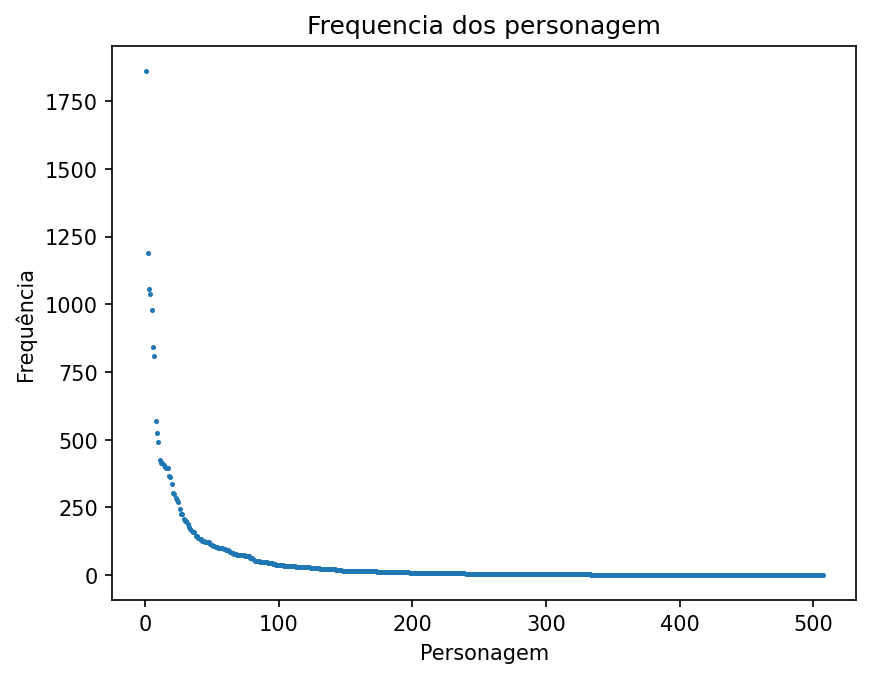

In [36]:
y_values = list(cod_frequencia.values())

plt.figure(dpi=150)
plt.scatter(x=indice, y=y_values, s=2)
plt.title('Frequencia dos personagem')
plt.xlabel('Personagem')
plt.ylabel('Frequência')
plt.show()

In [37]:
valor_acumulado = []
for i in range(len(counts_personagens)) :
    if i == 0:
        valor_acumulado.append(counts_personagens[i])
    else:
        valor_acumulado.append(valor_acumulado[i-1] + counts_personagens[i])

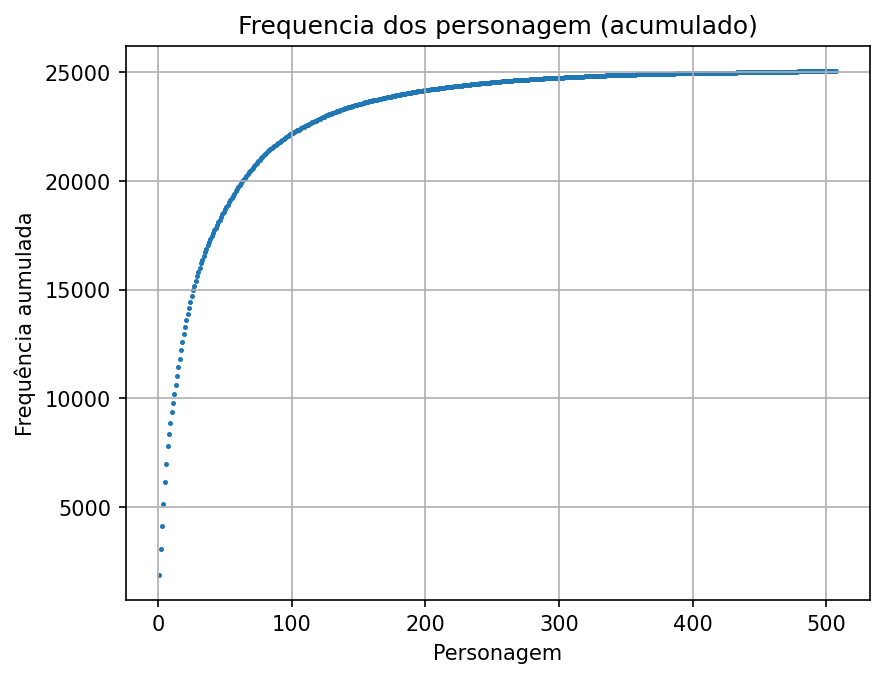

In [38]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=valor_acumulado, s=2)
plt.title('Frequencia dos personagem (acumulado)')
plt.xlabel('Personagem')
plt.ylabel('Frequência aumulada')
plt.grid()
plt.show()

In [39]:
media_valor_acumulado = [ (i/valor_acumulado[-1])*100 for i in valor_acumulado ]

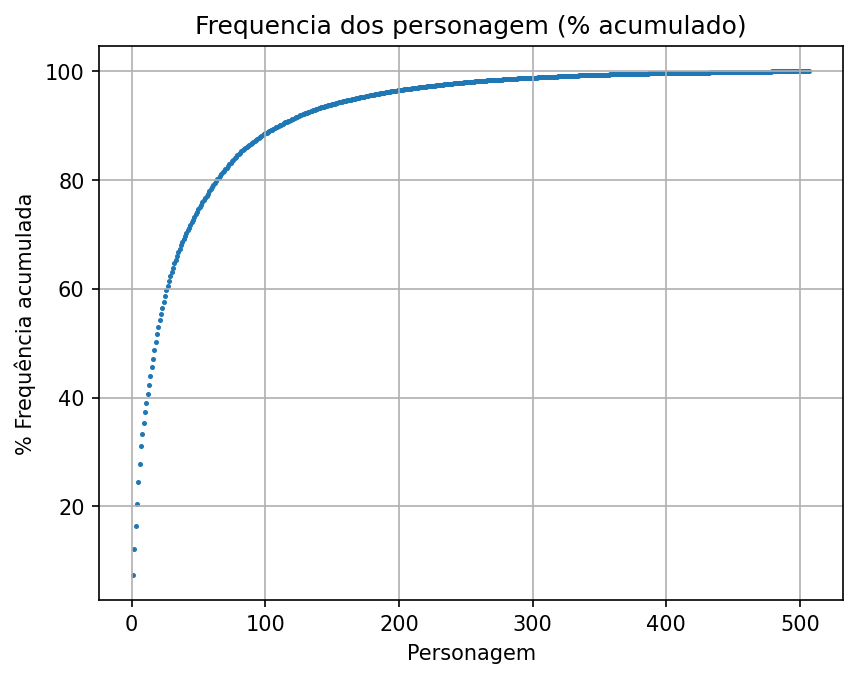

In [40]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=media_valor_acumulado, s=2)
plt.title('Frequencia dos personagem (% acumulado)')
plt.xlabel('Personagem')
plt.ylabel('% Frequência acumulada')
plt.grid()
plt.show()

### Separando as cenas

In [ ]:
# Separando as cemas
c=1
cenas = []
for i in range(len(df)):
    # c += 1 if df.iloc[i,1] == 0 else 0
    if df.iloc[i,3] == 0:
      if i > False and df.iloc[i-1,3] != False:
        c += 1
    cenas.append(c)

df['cena'] = cenas

## Criando o Grafo

## TESTE

In [110]:
df['PERSONAGEM'].value_counts()

-                                10817
TYRION                            1862
JON                               1188
DAENERYS                          1056
CERSEI                            1037
                                 ...  
HUNTERS                              1
HARPY                                1
MOSADOR                              1
UNIDENTIFIED NIGHT’S WATCHERS        1
VALE LORD                            1
Name: PERSONAGEM, Length: 461, dtype: int64

In [18]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'^...$')]
df_filtro['PERSONAGEM'].unique()

array(['JON', 'NED', 'ROS', 'PYP', 'SAM', 'MAN', 'ALL', 'EDD', 'ROZ',
       'MEN', 'BOY', 'NAN', 'RAY', 'LEM', 'KAR'], dtype=object)

In [24]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'\bKAR\b')]
df_filtro['PERSONAGEM'].unique()

array(['RICKARD KAR', 'LORD KAR', 'KAR'], dtype=object)

In [31]:
# df_filtrado = df[~df['TEXTO'].str.startswith(df['PERSONAGEM'])]
df_filtrado = df[df.apply(lambda row: not row['TEXTO'].startswith(row['PERSONAGEM']), axis=1)]
df_filtrado = df[df['PERSONAGEM'] != '-']
df_filtrado

,TEMPORADA,EPSODIO,TEXTO,FALA,PERSONAGEM
2,01,01,WAYMAR ROYCE: What d’you expect? They’re savag...,True,WAYMAR ROYCE
3,01,01,WILL: I’ve never seen wildlings do a thing lik...,True,WILL
4,01,01,WAYMAR ROYCE: How close did you get?,True,WAYMAR ROYCE
5,01,01,WILL: Close as any man would.,True,WILL
6,01,01,GARED: We should head back to the wall.,True,GARED
...,...,...,...,...,...
35831,08,06,BRIENNE: I think we can all agree that ships t...,True,BRIENNE
35832,08,06,BRONN: I think that's a very presumptuous stat...,True,BRONN
35833,08,06,TYRION: I once brought a jackass and a honeyco...,True,TYRION
35878,08,06,MAN: The Queen in the North!,True,MAN


In [30]:
# df_teste = df[df['PERSONAGEM'] == 'ALL']
df_teste = df[df['TEXTO'].str.contains(r'^Vardis Egen')]
df_teste

,TEMPORADA,EPSODIO,TEXTO,FALA,PERSONAGEM
1939,01,05,"Vardis Egen: You're far from home, Lady Stark.",True,VARDIS EGEN
1941,01,05,"Vardis Egen: Ser Vardis Egen, Knight of The Va...",True,VARDIS EGEN
1943,01,05,"Vardis Egen: May I ask, my Lady, why he is wit...",True,VARDIS EGEN
1945,01,05,Vardis Egen: He doesn't look like a prisoner.,True,VARDIS EGEN
1947,01,05,"Vardis Egen: Yes, my Lady. She will at that.",True,VARDIS EGEN


In [31]:
df['PERSONAGEM'].unique()

array(['-', 'ROYCE', 'WILL', 'GARED', 'JON', 'MORD', 'SANSA', 'NED',
       'ROBB', 'CASSEL', 'CATELYN', 'BRAN', 'THEON', 'JAIME', 'CERSEI',
       'LUWIN', 'ARYA', 'ROBERT', 'TYRION', 'ROS', 'VISERYS', 'DAENERYS',
       'MAID', 'ILLYRIO', 'BENJEN', 'A VOICE', 'JORAH', 'KHAL DROGO',
       'THE HOUND', 'DOREAH', 'IRRI', 'SANDOR CLEGANE', 'ASSASSIN',
       'JHIQUI', 'MYCAH', 'SOLDIER', 'GUARD', 'VARYS', 'LITTLEFINGER',
       'GRAND MAESTER PYCELLE', 'OLD NAN', 'ALLISER THORNE', 'JEOR ',
       'GRENN', 'PYP', 'RAST', 'BARRISTAN SELMY', 'LANCEL ', 'RAKHARO',
       'YOREN', 'RHAKARO', 'MAESTER AEMON', 'SYRIO FOREL', 'SAM',
       'JANOS SLYNT', 'HUGH OF THE VALE', 'TOBHO MOTT', 'GENDRY',
       'MARILLION', 'MASHA HEDDLE', 'BRONN', 'KNIGHT OF HOUSE WHENT',
       'KNIGHT OF HOUSE BRACKEN', 'LORAS TYRELL', 'VARDIS EGEN',
       'STEWARD', 'LYSA ARRYN', 'ROBIN ARRYN', 'MHAEGEN', 'OSHA',
       'WILDLING', 'JORA', 'KNIGHT 1', 'KNIGHT 2', 'KNIGHT 3', 'KNIGHT 4',
       'KNIGHT 5', 'SER VA

In [47]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'^\w+\s\w+\s\w+\s\w+\s\w+$')]
df_filtro['PERSONAGEM'].unique()

array(['THE OTHERS AT THE TABLE', 'JON WALKS UP TO SAMWELL'], dtype=object)

In [10]:
from itertools import combinations

In [11]:
df_cleaned = df.dropna()
df_groupby = df_cleaned.groupby('cena')['character'].unique().apply(list).reset_index()
df_groupby = df_groupby.rename(columns={'character': 'list_character'})
df_groupby['list_of_edges'] = df_groupby['list_character'].apply(lambda chars: list(combinations(chars, 2)))

In [12]:
df_groupby.head(3)

,cena,list_character,list_of_edges
0,1,"[WAYMAR ROYCE, WILL, GARED, ROYCE]","[(WAYMAR ROYCE, WILL), (WAYMAR ROYCE, GARED), ..."
1,2,"[WILL, ROYCE]","[(WILL, ROYCE)]"
2,3,"[ROYCE, WILL, GARED]","[(ROYCE, WILL), (ROYCE, GARED), (WILL, GARED)]"


In [13]:
G = nx.Graph()
character = df['character'].dropna().unique()
list_of_nodes = character
G.add_nodes_from(list_of_nodes)

In [18]:
# Adicionando arestas ao grafo
for edges in df_groupby['list_of_edges']:
    G.add_edges_from(edges)

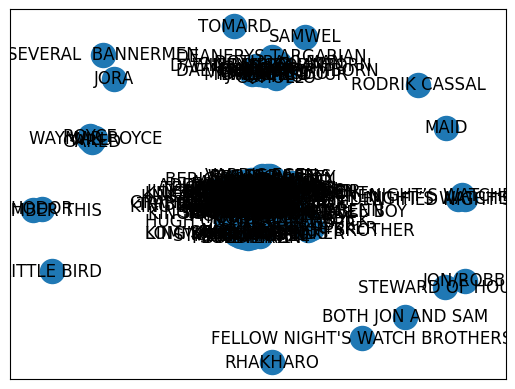

In [21]:
nx.draw_networkx(G)

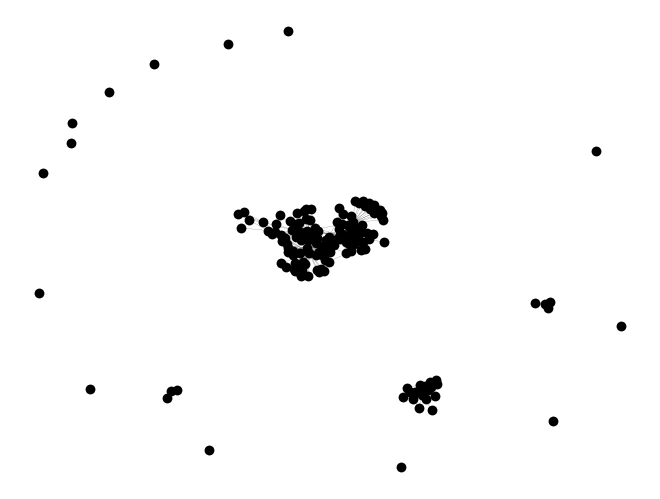

In [28]:
options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

KeyError: 'WAYMAR ROYCE'

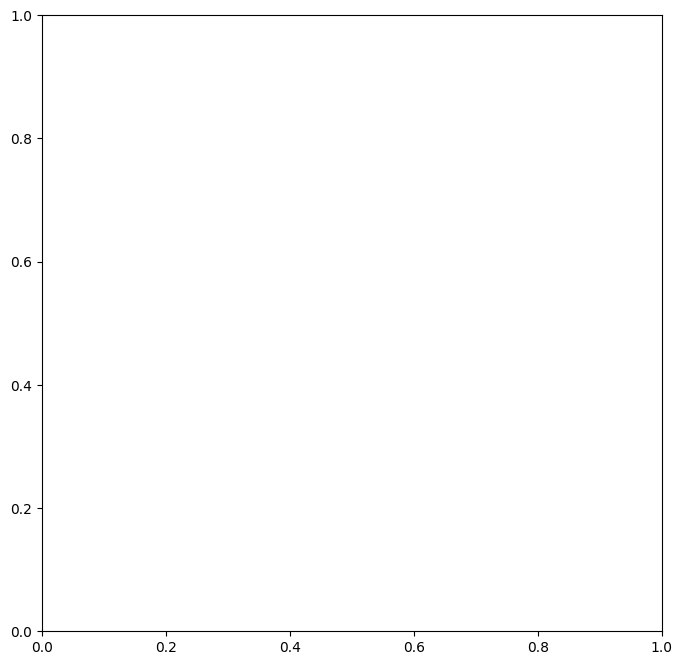

In [25]:
# pos = nx.get_node_attributes(G, "pos")
# # p = dict(nx.single_source_shortest_path_length(G, ncenter))

# plt.figure(figsize=(8, 8))
# nx.draw_networkx_edges(G, pos, alpha=0.4)
# nx.draw_networkx_nodes(
#     G,
#     pos,
#     # nodelist=list(p.keys()),
#     node_size=80,
#     # node_color=list(p.values()),
#     cmap=plt.cm.Reds_r,
# )

# plt.xlim(-0.05, 1.05)
# plt.ylim(-0.05, 1.05)
# plt.axis("off")
# plt.show()

In [17]:
import matplotlib.pyplot as plt

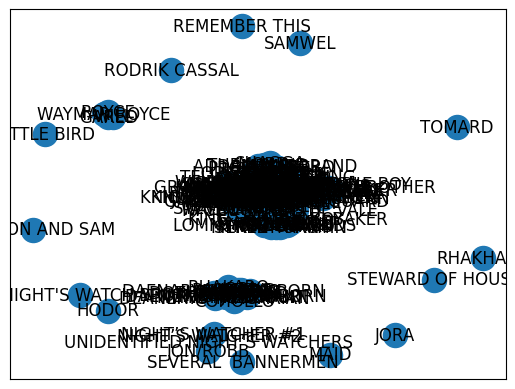

In [20]:
def plot_network(G):
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G, seed = 42)

    nx.draw_networkx(G, pos)

plot_network(G)

In [ ]:
df.head(3)

In [ ]:
# df.head(200)

In [ ]:
# pd.set_option('display.max_rows', None)
df['character'].value_counts()

In [ ]:
# pd.set_option('display.max_rows', None)
# df['character'].value_counts() #.head(100)
df['character'].unique()

In [ ]:
arquivo = 'got_s01e01.txt'

with open(arquivo, 'r', encoding = 'utf-8') as f:
    texto = f.read()

In [ ]:
df = pd.DataFrame(texto.split('\n'), columns=['texto'])

In [ ]:
df.dropna(inplace=True)
df.drop(df[df['texto']==''].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df['conversa'] = df['texto'].apply(lambda x: 1 if ':' in x else 0)

In [ ]:
c=0
cenas = []
for i in range(len(df)):
    c += 1 if df.iloc[i,1] == 0 else 0
    cenas.append(c)

df['cena'] = cenas

In [ ]:
df['personagem'] = df[df['conversa']==1]['texto'].str.split(':')
df['personagem'] = df['personagem'].apply(lambda x: x[0] if type(x) == type(list()) else '')

In [ ]:
def remover_conteudo_entre_parenteses(texto):
  if isinstance(texto, str):
    texto = re.sub(r'\([^)]*\)', '', texto)
    return texto.strip()
  else:
    return texto

#df['personagem'] = df['personagem'].apply(re.sub(r'\([^)]*\)', '', df['personagem']))
df['personagem'] = df['personagem'].apply(remover_conteudo_entre_parenteses)


In [ ]:
df.info()